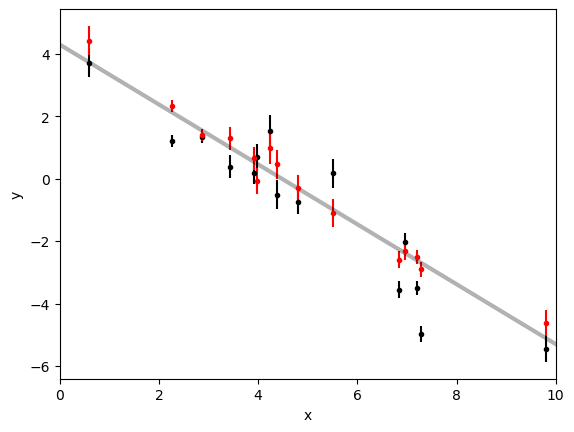

In [66]:
### fitting a line to data when you don’t believe the error bars on your data
### we’re going to consider a linear model where the quoted uncertainties are underestimated by a constant fractional amount.

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123) # each random realization in this script will be different but when running again
                    # from scratch you will find the same realizations 

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 15
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

y2 = m_true * x + b_true
y2 += yerr * np.random.randn(N)


plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.errorbar(x, y2, yerr=yerr, fmt=".r", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

Least-squares estimates for 1:
m = -1.104 ± 0.016
b = 5.441 ± 0.091
Least-squares estimates for 2:
m = -0.964 ± 0.016
b = 4.289 ± 0.091


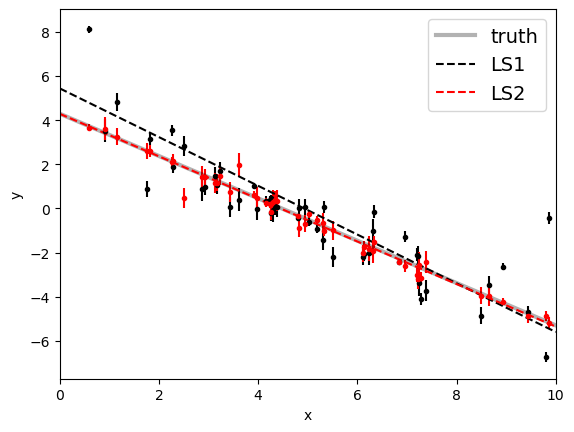

In [7]:
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr**2))
print("Least-squares estimates for 1:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

w2 = np.linalg.solve(ATA, np.dot(A.T, y2 / yerr**2))
print("Least-squares estimates for 2:")
print("m = {0:.3f} ± {1:.3f}".format(w2[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w2[1], np.sqrt(cov[1, 1])))


plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.errorbar(x, y2, yerr=yerr, fmt=".r", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w1), "--k", label="LS1")
plt.plot(x0, np.dot(np.vander(x0, 2), w2), "--r", label="LS2")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

0.21995884529360155
0.036574980966328226
-0.054989711323400386
-0.054989711323400386
0.22178848500941128
0.035782247902408255
-0.05483241534226576
-0.05483241534226576


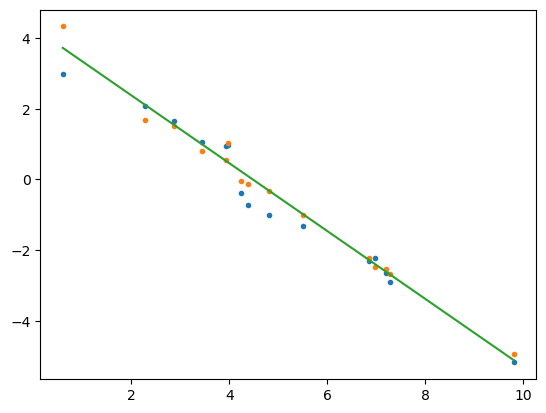

In [74]:
mean = m_true * x + b_true
offdiag = 0.25*yerr[:-1]**2*np.ones(len(x)-1)
cov = np.diag(np.full(len(x),yerr**2))+np.diag(offdiag,1)+np.diag(offdiag,-1)
y3 = np.random.multivariate_normal(mean, cov)

offdiag = -0.25*yerr[:-1]**2*np.ones(len(x)-1)
cov = np.diag(np.full(len(x),yerr**2))+np.diag(offdiag,1)+np.diag(offdiag,-1)
y4 = np.random.multivariate_normal(mean, cov)

print(cov[0,0])
print(cov[1,1])
print(cov[1,0])
print(cov[0,1])

plt.plot(x,y3,'.')
plt.plot(x,y4,'.')
plt.plot(x,mean)

nreals = 10000
yy = np.zeros((nreals,N))
for i in range(nreals):
    yy[i,:] = np.random.multivariate_normal(mean, cov)

covv = np.cov(yy,rowvar=False)
print(covv[0,0])
print(covv[1,1])
print(covv[1,0])
print(covv[0,1])


In [64]:
### The least squares solution found in the previous section is the maximum likelihood result
### for a model where the error bars are assumed correct, Gaussian and independent.
### We know, of course, that this isn’t the right model. Unfortunately, there isn’t a generalization
### of least squares that supports a model like the one that we know to be true. Instead, we need to
### write down the likelihood function and numerically optimize it.

In [44]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

def log_likelihood2(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    sigma2 = yerr**2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Maximum likelihood estimates:
m = -0.964
b = 4.289


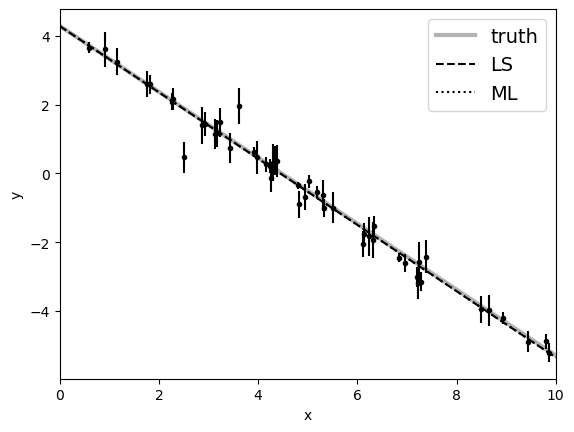

In [80]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood2(*args)
initial = np.array([m_true, b_true]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial, args=(x, y2, yerr))
m_ml, b_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
# print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y2, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w2), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");


Maximum likelihood estimates:
m = -1.003
b = 4.528
f = 0.454


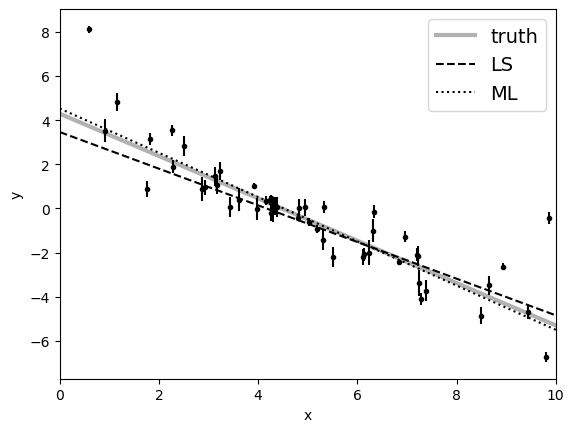

In [81]:
np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [82]:
def log_prior(theta):
    m, b, log_f = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < log_f < 1.0:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [89]:
import emcee

ndim = 3
nwalkers = 32

pos = soln.x + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x, y, yerr)
)

nsteps = 5000

sampler.run_mcmc(pos, nsteps);#, progress=True);

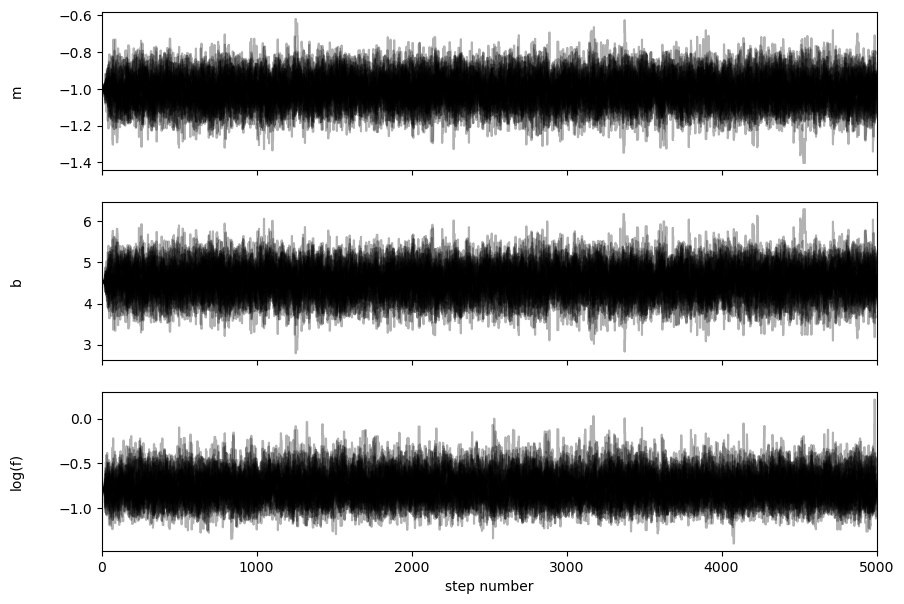

In [90]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [91]:
tau = sampler.get_autocorr_time()
print(tau)

[33.47736548 33.4716946  38.89948359]


In [92]:
print(samples.shape)
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(5000, 32, 3)
(10432, 3)


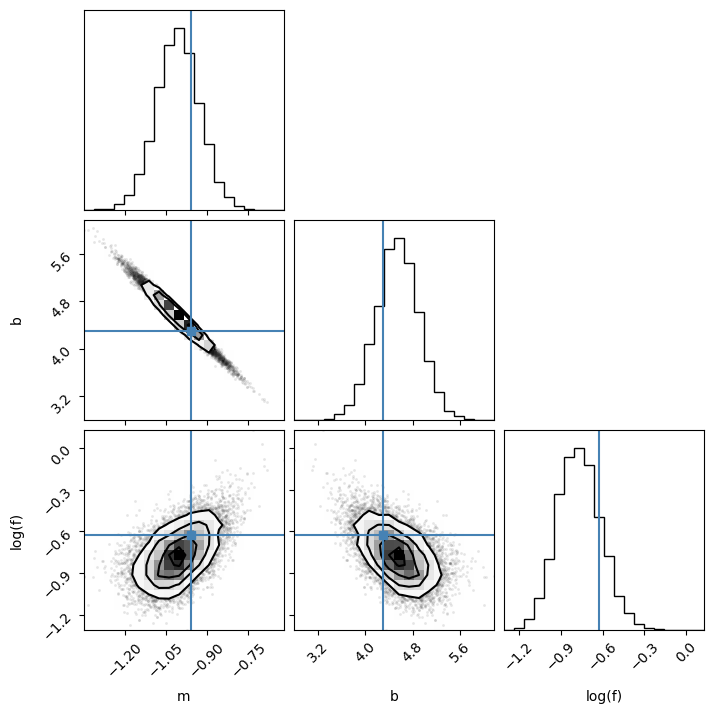

In [93]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[m_true, b_true, np.log(f_true)]
);

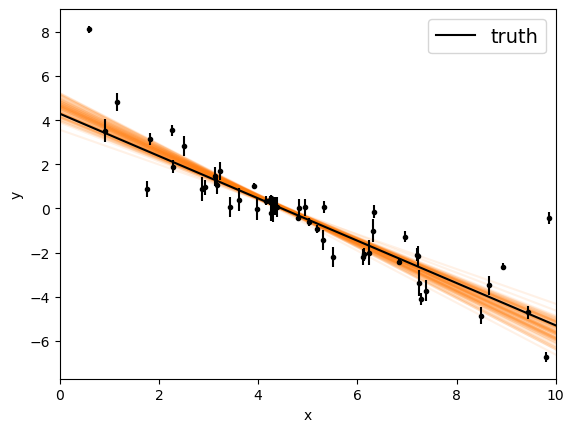

In [94]:
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [118]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84]) # 50th is the median, then it takes 34% to the left and 34% to the right
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
### Now with a given covariance matrix

mean = np.zeros